# Starbucks Capstone Challenge 
## Evaluate model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set_theme(style='darkgrid')

In [2]:
# describe experiment
description = 'Rerunning to understand: Random over sampler used to oversample train data to deal with class (viewed) imbalance.'

In [3]:
# load feature names
feature_names = pd.read_pickle('../data/processed/feature_names.pkl')

# load model 
model = pd.read_pickle('../data/models/classifier.pkl')

# load test data
X_test = pd.read_pickle('../data/processed/X_test.pkl')

y_test = pd.read_pickle('../data/processed/y_test.pkl')

### 5. Evaluate model

In [4]:
y_pred = model.predict(X_test)

In [5]:
print(accuracy_score(y_test, y_pred))

0.5994644223412395


In [6]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [7]:
tn, fp, fn, tp

(70, 96, 951, 1497)

In [8]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

       False       0.07      0.42      0.12       166
        True       0.94      0.61      0.74      2448

    accuracy                           0.60      2614
   macro avg       0.50      0.52      0.43      2614
weighted avg       0.88      0.60      0.70      2614



In [9]:
importances = model.feature_importances_

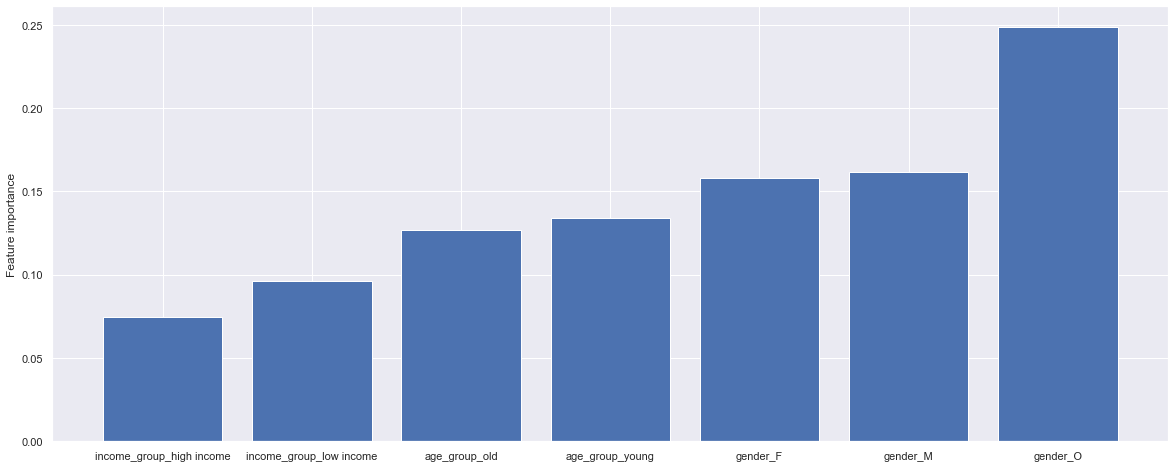

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(feature_names, sorted(importances));
plt.ylabel('Feature importance');

In [11]:
with open('../experimentlog.txt', 'a') as f:
    f.write('\n {}: {} Accuracy: {}, confusion matrix {}'. format(datetime.now(), description, accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred).ravel()))